### 재무제표별 분류해서 합치고 저장

In [18]:
import pandas as pd

order_list = ['01','02','03','04','05','06','07','08','09'] + list(range(10, 38))

for order in order_list:
    print(order)
    df = pd.read_excel(f"../data/batches_2015_2023/dart_statements_2015_2023_batch_{order}.xlsx")

    # 컬럼명 한글로 변경
    df = df.rename(columns={
        'corp_code': '회사코드',
        'corp_name': '회사명',
        'stock_code': '종목코드',
        'bsns_year': '사업연도',
        'rcept_no': '접수번호',
        'reprt_code': '보고서코드',
        'fs_div': '재무구분',
        'fs_nm': '재무구분명',
        'sj_div': '재무제표구분',
        'sj_nm': '재무제표명',
        'account_nm': '계정명',
        'thstrm_nm': '당기명',
        'thstrm_dt': '당기일자',
        'thstrm_amount': '당기금액',
        'frmtrm_nm': '전기명',
        'frmtrm_dt': '전기일자',
        'frmtrm_amount': '전기금액',
        'bfefrmtrm_nm': '전전기명',
        'bfefrmtrm_dt': '전전기일자',
        'bfefrmtrm_amount': '전전기금액',
        'ord': '순서',
        'currency': '통화'
    })

    # 그냥 / 연결 나누기
    print('재무구분명 :', df['재무구분명'].unique())

    재무제표 = df.loc[df['재무구분명'] == '재무제표']
    연결재무제표 = df.loc[df['재무구분명'] == '연결재무제표']

    # 재무상태표 / 손익계산서 나누기
    print('재무구분명 :', df['재무제표명'].unique())

    재무제표_재무상태표 = 재무제표.loc[재무제표['재무제표명'] == '재무상태표']
    재무제표_손익계산서 = 재무제표.loc[재무제표['재무제표명'] == '손익계산서']
    연결재무제표_재무상태표 = 연결재무제표.loc[연결재무제표['재무제표명'] == '재무상태표']
    연결재무제표_손익계산서 = 연결재무제표.loc[연결재무제표['재무제표명'] == '손익계산서']

    # To CSV
    재무제표_재무상태표.to_csv(f"../data/test/재무제표_재무상태표_{order}.csv", encoding="utf-8-sig")
    재무제표_손익계산서.to_csv(f"../data/test/재무제표_손익계산서_{order}.csv", encoding="utf-8-sig")
    연결재무제표_재무상태표.to_csv(f"../data/test/연결재무제표_재무상태표_{order}.csv", encoding="utf-8-sig")
    연결재무제표_손익계산서.to_csv(f"../data/test/연결재무제표_손익계산서_{order}.csv", encoding="utf-8-sig")

01
재무구분명 : ['재무제표' '연결재무제표']
재무구분명 : ['재무상태표' '손익계산서']
02
재무구분명 : ['재무제표' '연결재무제표']
재무구분명 : ['재무상태표' '손익계산서']
03
재무구분명 : ['재무제표' '연결재무제표']
재무구분명 : ['재무상태표' '손익계산서']
04
재무구분명 : ['연결재무제표' '재무제표']
재무구분명 : ['재무상태표' '손익계산서']
05
재무구분명 : ['재무제표' '연결재무제표']
재무구분명 : ['재무상태표' '손익계산서']
06
재무구분명 : ['재무제표' '연결재무제표']
재무구분명 : ['재무상태표' '손익계산서']
07
재무구분명 : ['연결재무제표' '재무제표']
재무구분명 : ['재무상태표' '손익계산서']
08
재무구분명 : ['연결재무제표' '재무제표']
재무구분명 : ['재무상태표' '손익계산서']
09
재무구분명 : ['재무제표' '연결재무제표']
재무구분명 : ['재무상태표' '손익계산서']
10
재무구분명 : ['연결재무제표' '재무제표']
재무구분명 : ['재무상태표' '손익계산서']
11
재무구분명 : ['연결재무제표' '재무제표']
재무구분명 : ['재무상태표' '손익계산서']
12
재무구분명 : ['연결재무제표' '재무제표']
재무구분명 : ['재무상태표' '손익계산서']
13
재무구분명 : ['연결재무제표' '재무제표']
재무구분명 : ['재무상태표' '손익계산서']
14
재무구분명 : ['연결재무제표' '재무제표']
재무구분명 : ['재무상태표' '손익계산서']
15
재무구분명 : ['연결재무제표' '재무제표']
재무구분명 : ['재무상태표' '손익계산서']
16
재무구분명 : ['재무제표' '연결재무제표']
재무구분명 : ['재무상태표' '손익계산서']
17
재무구분명 : ['연결재무제표' '재무제표']
재무구분명 : ['재무상태표' '손익계산서']
18
재무구분명 : ['연결재무제표' '재무제표']
재무구분명 : ['재무상태표' '손익계산서']
19
재무구분명 :

### To Pivot
- file_name 바꿔줘야함

In [38]:
import glob
# 가져오기
file_name = "연결재무제표_손익계산서"
file_list = glob.glob(f"../data/test/{file_name}_*.csv")

dfs = []
for file in file_list:
    df_tmp = pd.read_csv(file)
    dfs.append(df_tmp)

# 모든 재무제표_재무상태표 파일을 하나의 데이터프레임으로 합치기
all = pd.concat(dfs, ignore_index=True)

# 'all'의 '당기금액' 컬럼을 숫자형으로 변환 (천 단위 구분기호 등 처리)
all['당기금액'] = pd.to_numeric(all['당기금액'].str.replace(',', ''), errors='coerce')

print(file_name, ' 계정명 :', all['계정명'].unique())

# To Pivot
pivot_df = all.pivot_table(
    index=['회사코드', '회사명', '종목코드', '사업연도'],
    columns='계정명',
    values='당기금액',
    aggfunc='first'
).reset_index()

# 내보내기
pivot_df.to_csv(f"../data/raw/{file_name}.csv", encoding="utf-8-sig")

연결재무제표_손익계산서  계정명 : ['매출액' '영업이익' '법인세차감전 순이익' '당기순이익' '당기순이익(손실)' '총포괄손익' '이자비용' '영업이익(손실)'
 '영업비용' '이자수익' '순이자손익' '순수수료손익' '파생상품관련손익']


### 재무제표_재무상태표 / 재무재표_손익계산서 Non-Null 분포

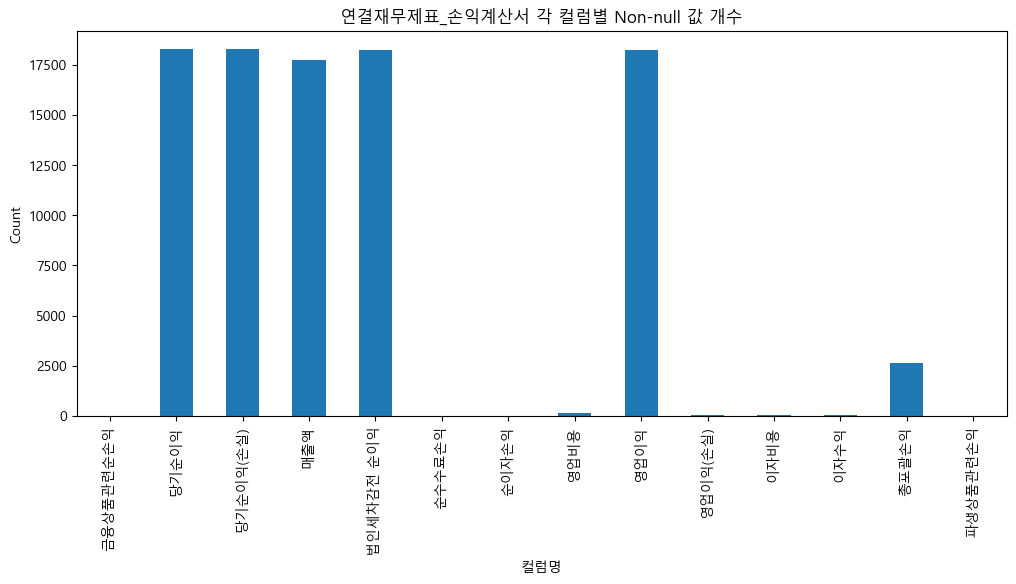

In [ ]:
import matplotlib.pyplot as plt

손익 = pd.read_csv("../data/raw/재무제표_손익계산서.csv")
# 5~18번 컬럼명 추출
cols = 손익.columns[5:19]

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rc('font', family='Malgun Gothic')

# 각 컬럼별 non-null count 계산
count_series = 손익[cols].count()

# plot
count_series.plot(kind='bar', figsize=(12, 5))
plt.title(f'{file_name} 각 컬럼별 Non-null 값 개수')
plt.ylabel('Count')
plt.xlabel('컬럼명')
plt.show()

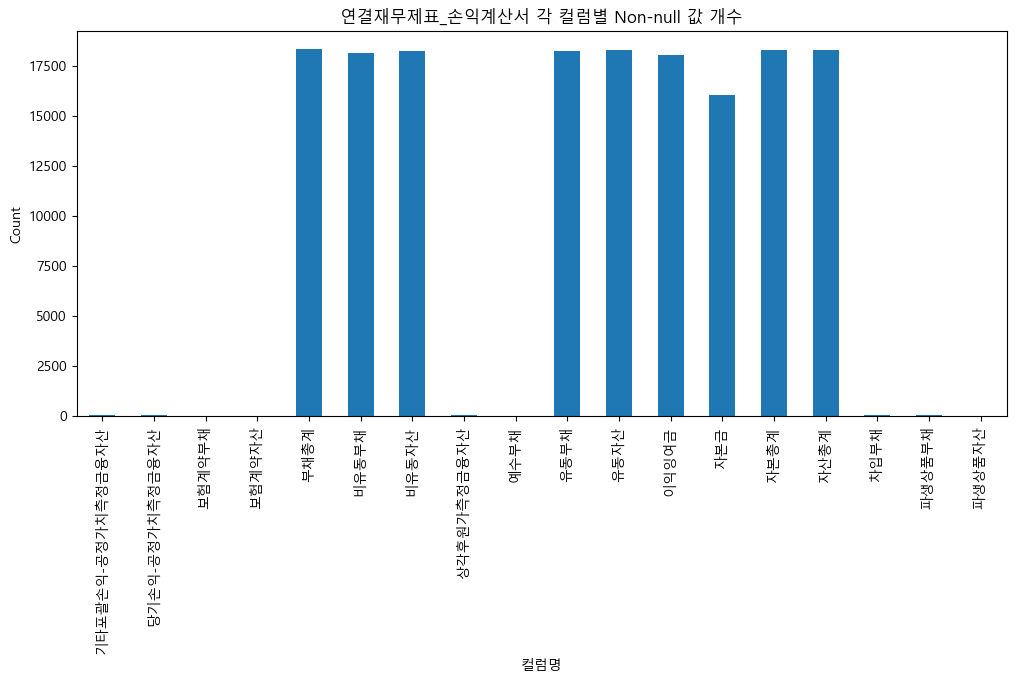

In [58]:
import matplotlib.pyplot as plt

상태 = pd.read_csv("../data/raw/재무제표_재무상태표.csv")

# 5~23번 컬럼명 추출
cols = 상태.columns[5:23]

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rc('font', family='Malgun Gothic')

# 각 컬럼별 non-null count 계산
count_series = 상태[cols].count()

# plot
count_series.plot(kind='bar', figsize=(12, 5))
plt.title(f'{file_name} 각 컬럼별 Non-null 값 개수')
plt.ylabel('Count')
plt.xlabel('컬럼명')
plt.show()

### 재무상태표, 손익계산서 피처 만들기
- 1차
  - 부채비율 유동비율 자기자본비율 고정자산비율 고정비율 순운전자본비율 ln자산총계 총자산이익잉여금비율 ln매출액 매출액순이익률

In [5]:
import pandas as pd

balance_sheet = pd.read_csv("../data/raw/재무제표_재무상태표.csv")
balance_sheet.columns

Index(['Unnamed: 0', '회사코드', '회사명', '종목코드', '사업연도', '기타포괄손익-공정가치측정금융자산',
       '당기손익-공정가치측정금융자산', '보험계약부채', '보험계약자산', '부채총계', '비유동부채', '비유동자산',
       '상각후원가측정금융자산', '예수부채', '유동부채', '유동자산', '이익잉여금', '자본금', '자본총계', '자산총계',
       '차입부채', '파생상품부채', '파생상품자산'],
      dtype='object')

In [4]:
income_statement = pd.read_csv("../data/raw/재무제표_손익계산서.csv")
income_statement.columns

Index(['Unnamed: 0', '회사코드', '회사명', '종목코드', '사업연도', '금융상품관련순손익', '당기순이익',
       '당기순이익(손실)', '매출액', '법인세차감전 순이익', '순수수료손익', '순이자손익', '영업비용', '영업이익',
       '영업이익(손실)', '이자비용', '이자수익', '총포괄손익', '파생상품관련손익'],
      dtype='object')

In [6]:
cash_flow = pd.read_csv("../data/raw/현금흐름표_간접법_별도_12월.csv")
cash_flow.columns

Index(['Unnamed: 0', '재무제표종류', '종목코드', '회사명', '시장구분', '업종', '업종명', '통화',
       '결산기준일', '기말의현금', '기초의현금', '영업활동현금흐름', '재무활동현금흐름', '투자활동현금흐름'],
      dtype='object')

In [7]:
bs = balance_sheet.copy()
iis = income_statement.copy()
cf = cash_flow.copy()

In [13]:
cf['사업연도'] = cf['결산기준일'].str[:4]
bs['사업연도'] = bs['사업연도'].astype(str)
iis['사업연도'] = iis['사업연도'].astype(str)

In [ ]:
# 건전성
bs['부채비율'] = (bs['부채총계'] / bs['자본총계'])
bs['유동비율'] = (bs['유동자산'] / bs['유동부채'])
bs['자기자본비율'] = (bs['자본총계'] / bs['자산총계'])
bs['고정자산비율'] = (bs['비유동자산'] / bs['자산총계'])
bs['고정비율'] = (bs['비유동자산'] / bs['자본총계'])
bs['순운전자본비율'] = ((bs['유동자산'] - bs['유동부채']) / bs['자산총계'])

In [15]:
import numpy as np

# 규모
bs['ln자산총계'] = np.log(bs['자산총계'])

c:\Users\tktk5\Downloads\RiskRadar\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [17]:
# 수익성
bs['총자산이익잉여금비율'] = (bs['이익잉여금'] / bs['자산총계'])

In [18]:
# 수익성
iis['매출액순이익률'] = iis['당기순이익'] / iis['매출액']

In [ ]:
# 규모
iis['ln매출액'] = np.log(iis['매출액'])

c:\Users\tktk5\Downloads\RiskRadar\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\tktk5\Downloads\RiskRadar\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
# 필요한 컬럼만 추출
bs_cols = ['사업연도', '회사명', '부채비율', '유동비율', '자기자본비율', '고정자산비율', '고정비율', '순운전자본비율', 'ln자산총계', '총자산이익잉여금비율']
iis_cols = ['사업연도', '회사명', 'ln매출액', '매출액순이익률']

bs_sel = bs[bs_cols]
iis_sel = iis[iis_cols]

# 머지
merged = pd.merge(bs_sel, iis_sel, on=['사업연도', '회사명'], how='outer')
merged.head()

,사업연도,회사명,부채비율,유동비율,자기자본비율,고정자산비율,고정비율,순운전자본비율,ln자산총계,총자산이익잉여금비율,ln매출액,매출액순이익률
0,2015,3S,0.763604,0.694608,0.567021,0.775610,1.367869,-0.098656,24.919477,-0.285427,23.772739,-0.262422
1,2015,AJ네트웍스,1.336227,0.412123,0.428041,0.850102,1.986031,-0.213824,27.141447,NaN,26.004031,0.097113
2,2015,AK홀딩스,0.115549,0.074425,0.896420,0.992424,1.107097,-0.094216,26.981501,0.350460,23.736496,1.072212
3,2015,APS,1.445113,1.040981,0.408979,0.467747,1.143695,0.020954,26.289558,0.189401,26.346126,0.033888
4,2015,AP위성,0.120534,8.092935,0.892432,0.199405,0.223440,0.701670,24.463482,0.402504,24.319690,0.241527


In [23]:
merged.isna().sum(), merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18354 entries, 0 to 18353
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   사업연도        18354 non-null  object 
 1   회사명         18354 non-null  object 
 2   부채비율        18296 non-null  float64
 3   유동비율        18279 non-null  float64
 4   자기자본비율      18278 non-null  float64
 5   고정자산비율      18228 non-null  float64
 6   고정비율        18196 non-null  float64
 7   순운전자본비율     18257 non-null  float64
 8   ln자산총계      18331 non-null  float64
 9   총자산이익잉여금비율  18023 non-null  float64
 10  ln매출액       17778 non-null  float64
 11  매출액순이익률     17734 non-null  float64
dtypes: float64(10), object(2)
memory usage: 1.7+ MB


(사업연도            0
 회사명             0
 부채비율           58
 유동비율           75
 자기자본비율         76
 고정자산비율        126
 고정비율          158
 순운전자본비율        97
 ln자산총계         23
 총자산이익잉여금비율    331
 ln매출액         576
 매출액순이익률       620
 dtype: int64,
 None)

In [24]:
merged.to_csv("../data/processed/features_v1.csv", encoding="utf-8-sig")